In [1]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem import PandasTools
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_classification', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


In [3]:
molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4).order_by('molecule_type').only(['indication_class', 
                                                                              'molecule_chembl_id', 
                                                                              'molecule_type', 
                                                                              'pref_name'])

df = pd.DataFrame(approved_drugs)
df

,indication_class,molecule_chembl_id,molecule_type,pref_name
0,None,CHEMBL4297774,Antibody,AMIVANTAMAB
1,None,CHEMBL1743007,Antibody,DARATUMUMAB
2,None,CHEMBL3301582,Antibody,POLATUZUMAB VEDOTIN
3,None,CHEMBL3301587,Antibody,DURVALUMAB
4,None,CHEMBL3301589,Antibody,ENFORTUMAB VEDOTIN
...,...,...,...,...
4187,Anti-Eczematic (topical),CHEMBL2108232,Unknown,COAL TAR
4188,Carminative; Stomachic; Counterirritant (exter...,CHEMBL2108236,Unknown,CAPSICUM
4189,None,CHEMBL2108245,Unknown,CREOSOTE CARBONATE
4190,Hemostatic (local),CHEMBL2108268,Unknown,"CELLULOSE, OXIDIZED"


In [4]:
df = df[df['molecule_type'] == 'Small molecule']
df.reset_index(drop=True, inplace=True)
df

,indication_class,molecule_chembl_id,molecule_type,pref_name
0,Anticholinergic,CHEMBL1240,Small molecule,PROPANTHELINE BROMIDE
1,Antihistaminic,CHEMBL1241,Small molecule,TRIPELENNAMINE
2,Analgesic (urinary tract),CHEMBL1242,Small molecule,PHENAZOPYRIDINE
3,None,CHEMBL141305,Small molecule,CYCLOFENIL
4,None,CHEMBL139877,Small molecule,SULFACARBAMIDE
...,...,...,...,...
3587,None,CHEMBL3989678,Small molecule,PIPERAZINE CITRATE
3588,None,CHEMBL3989691,Small molecule,ELTROMBOPAG OLAMINE
3589,None,CHEMBL3989693,Small molecule,LEVALBUTEROL TARTRATE
3590,None,CHEMBL3989694,Small molecule,OLANZAPINE PAMOATE


In [5]:
df = df.drop_duplicates(ignore_index=True)
df


,indication_class,molecule_chembl_id,molecule_type,pref_name
0,Anticholinergic,CHEMBL1240,Small molecule,PROPANTHELINE BROMIDE
1,Antihistaminic,CHEMBL1241,Small molecule,TRIPELENNAMINE
2,Analgesic (urinary tract),CHEMBL1242,Small molecule,PHENAZOPYRIDINE
3,None,CHEMBL141305,Small molecule,CYCLOFENIL
4,None,CHEMBL139877,Small molecule,SULFACARBAMIDE
...,...,...,...,...
3210,None,CHEMBL3989678,Small molecule,PIPERAZINE CITRATE
3211,None,CHEMBL3989691,Small molecule,ELTROMBOPAG OLAMINE
3212,None,CHEMBL3989693,Small molecule,LEVALBUTEROL TARTRATE
3213,None,CHEMBL3989694,Small molecule,OLANZAPINE PAMOATE


In [6]:
compounds_provider = molecule.filter(
    molecule_chembl_id__in=list(df["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [7]:
compounds = list(tqdm(compounds_provider))

100%|██████████| 3215/3215 [12:11<00:00,  4.39it/s]


In [8]:
drug_approved_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3215, 2)


In [9]:
drug_approved_df

,molecule_chembl_id,molecule_structures
0,CHEMBL2,{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...
1,CHEMBL3,"{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '..."
2,CHEMBL4,{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...
3,CHEMBL5,{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...
4,CHEMBL6,{'canonical_smiles': 'COc1ccc2c(c1)c(CC(=O)O)c...
...,...,...
3210,CHEMBL5095049,{'canonical_smiles': 'C1=C/COCc2cc(ccc2OCCN2CC...
3211,CHEMBL5095050,{'canonical_smiles': 'CCCCCCCCCCCCOS(=O)(=O)O....
3212,CHEMBL5095051,{'canonical_smiles': 'COc1ccc(C(CN(C)C)C2(O)CC...
3213,CHEMBL5095496,None


In [10]:
drug_approved_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3012, 2)


In [11]:
canonical_smiles = []

for i, compounds in drug_approved_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

drug_approved_df["smiles"] = canonical_smiles
drug_approved_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3012, 2)


In [12]:
drug_approved_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {drug_approved_df.shape}")

DataFrame shape: (3012, 2)


In [13]:
df.columns

Index(['indication_class', 'molecule_chembl_id', 'molecule_type', 'pref_name'], dtype='object')

In [14]:
drug_approved_df.columns

Index(['molecule_chembl_id', 'smiles'], dtype='object')

In [15]:
output_df = pd.merge(
    df[['molecule_chembl_id']],
    drug_approved_df,
    on='molecule_chembl_id'
)

output_df.drop_duplicates(inplace=True)
output_df.reset_index(drop=True, inplace=True)

print(f"Dataset with {output_df.shape[0]} entries.")


Dataset with 3012 entries.


In [16]:
output_df

,molecule_chembl_id,smiles
0,CHEMBL1240,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...
1,CHEMBL1241,CN(C)CCN(Cc1ccccc1)c1ccccn1
2,CHEMBL1242,Nc1ccc(/N=N/c2ccccc2)c(N)n1
3,CHEMBL141305,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1
4,CHEMBL139877,NC(=O)NS(=O)(=O)c1ccc(N)cc1
...,...,...
3007,CHEMBL3989678,C1CNCCN1.C1CNCCN1.C1CNCCN1.O.O=C(O)CC(O)(CC(=O...
3008,CHEMBL3989691,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...
3009,CHEMBL3989693,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...
3010,CHEMBL3989694,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1.O.O=C(O)c1...


In [17]:
output_df.insert(2, 'type', 'approved_drug')
output_df

,molecule_chembl_id,smiles,type
0,CHEMBL1240,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...,approved_drug
1,CHEMBL1241,CN(C)CCN(Cc1ccccc1)c1ccccn1,approved_drug
2,CHEMBL1242,Nc1ccc(/N=N/c2ccccc2)c(N)n1,approved_drug
3,CHEMBL141305,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1,approved_drug
4,CHEMBL139877,NC(=O)NS(=O)(=O)c1ccc(N)cc1,approved_drug
...,...,...,...
3007,CHEMBL3989678,C1CNCCN1.C1CNCCN1.C1CNCCN1.O.O=C(O)CC(O)(CC(=O...,approved_drug
3008,CHEMBL3989691,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,approved_drug
3009,CHEMBL3989693,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...,approved_drug
3010,CHEMBL3989694,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1.O.O=C(O)c1...,approved_drug


In [18]:
approved_drugs_mol = []

for _, smiles, type in output_df[['smiles', 'type']].itertuples():
    approved_drugs_mol.append((Chem.MolFromSmiles(smiles), type))
approved_drugs_mol[:5]

[13:17:40] WARNING: not removing hydrogen atom without neighbors
[13:17:40] WARNING: not removing hydrogen atom without neighbors
[13:17:40] WARNING: not removing hydrogen atom without neighbors
[13:17:40] WARNING: not removing hydrogen atom without neighbors


[(<rdkit.Chem.rdchem.Mol at 0x1826822fe60>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x1826822fed0>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x1826822ff40>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x1826822fca0>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x1826822fd10>, 'approved_drug')]

In [19]:
approved_drugs_structure = pd.DataFrame(approved_drugs_mol, columns=['structure', 'type'])
approved_drugs_structure.shape

(3012, 2)

In [20]:
df2 = pd.read_csv('pIC50.csv')
df2 = df2[['smiles', 'bioactivity']]
df2

,smiles,bioactivity
0,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active
1,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active
2,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active
3,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,Active
4,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,Active
...,...,...
401,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,Active
402,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,Active
403,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active
404,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,Active


In [21]:
gpr6_compounds_mol = []

for _, smiles, type in df2[['smiles', 'bioactivity']].itertuples():
    gpr6_compounds_mol.append((Chem.MolFromSmiles(smiles), type))
gpr6_compounds_mol[:5]

[(<rdkit.Chem.rdchem.Mol at 0x1826830dd90>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1826830dee0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1826830e180>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1826830e0a0>, 'Active'),
 (<rdkit.Chem.rdchem.Mol at 0x1826822fd80>, 'Active')]

In [22]:
gpr6_compounds_structure = pd.DataFrame(gpr6_compounds_mol, columns=['structure', 'type'])
gpr6_compounds_structure.head()

,structure,type
0,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
1,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
2,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
3,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
4,<rdkit.Chem.rdchem.Mol object at 0x00000182682...,Active


In [23]:
df_all = pd.concat([approved_drugs_structure, gpr6_compounds_structure])
df_all

,structure,type
0,<rdkit.Chem.rdchem.Mol object at 0x00000182682...,approved_drug
1,<rdkit.Chem.rdchem.Mol object at 0x00000182682...,approved_drug
2,<rdkit.Chem.rdchem.Mol object at 0x00000182682...,approved_drug
3,<rdkit.Chem.rdchem.Mol object at 0x00000182682...,approved_drug
4,<rdkit.Chem.rdchem.Mol object at 0x00000182682...,approved_drug
...,...,...
401,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
402,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
403,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
404,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active


In [24]:
from rdkit.Chem import MACCSkeys

In [25]:
def generate_maccs(data):
    maccs_fingerprint = [MACCSkeys.GenMACCSKeys(mol) for mol in data]
    return maccs_fingerprint

maccsfp = generate_maccs(df_all.structure[:])
print("Number of compounds converted:", len(maccsfp))
print("Fingerprint length per compound:", len(maccsfp[0]))

Number of compounds converted: 3418
Fingerprint length per compound: 167


In [26]:
fp_name_maccs = [f'Bit_{i}' for i in range(167)]
fp_bits_maccs = [list(l) for l in maccsfp]

maccsfp_df = pd.DataFrame(fp_bits_maccs, index=df_all["type"], columns=fp_name_maccs)
maccsfp_df.reset_index(inplace=True)
maccsfp_df.rename(columns={"index": "type"})
maccsfp_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,approved_drug,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
2,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
3,approved_drug,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0


In [27]:
maccsfp_df_umap = maccsfp_df.iloc[:, 1:]
maccsfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3414,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,1
3415,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0
3416,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,1,1,1,0


In [28]:
import umap.umap_ as umap
import umap.plot

c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\supak\anaconda3\envs\my-rdkit-env\lib\site-packages\umap\distances.

In [29]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_maccs = umapper.fit_transform(maccsfp_df_umap)

data_umap_maccs_x = pd.DataFrame(data_umap_maccs[:, 0], columns = ['x'])
data_umap_maccs_y = pd.DataFrame(data_umap_maccs[:, 1], columns = ['y'])
type = pd.DataFrame(maccsfp_df["type"].values, columns = ['type'])
plot_umap_maccs = pd.concat([type, data_umap_maccs_x, data_umap_maccs_y], axis = 1)
plot_umap_maccs

,type,x,y
0,approved_drug,3.061494,13.030529
1,approved_drug,3.107042,13.705087
2,approved_drug,1.801242,12.896930
3,approved_drug,0.112979,12.017802
4,approved_drug,6.387983,7.204997
...,...,...,...
3413,Active,5.242373,12.561885
3414,Active,5.291395,11.859082
3415,Active,7.084736,7.665964
3416,Active,7.072261,7.653235


In [30]:
import seaborn as sns

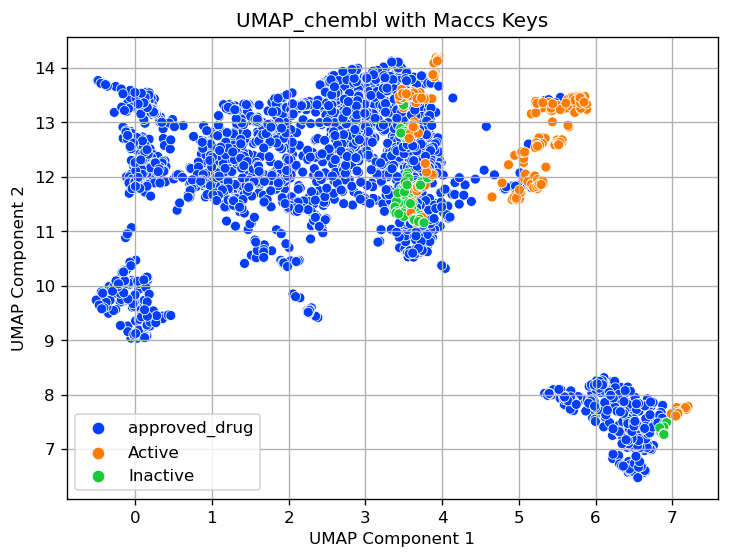

In [31]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_maccs, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP_chembl with Maccs Keys', fontsize=12)
plt.show()

In [32]:
from rdkit.Chem import AllChem

In [33]:
def generate_mfpts(data):
    Mfpts = [AllChem.GetMorganFingerprintAsBitVect(mol, 4, nBits=2048) for mol in data]
    return Mfpts

mfpts = generate_mfpts(df_all.structure[:])
print("Number of compounds converted:", len(mfpts))
print("Fingerprint length per compound:", len(mfpts[0]))

Number of compounds converted: 3418
Fingerprint length per compound: 2048


In [34]:
fp_name_morgan = [f'Bit_{i}' for i in range(2048)]
fp_bits_morgan = [list(l) for l in mfpts]

morganfp_df = pd.DataFrame(fp_bits_morgan, index=df_all["type"], columns=fp_name_morgan)
morganfp_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp_df.rename(columns={"index": "type"})# Rename the index column to "cid"
morganfp_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,approved_drug,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,approved_drug,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
morganfp_df_umap = morganfp_df.iloc[:, 1:]
morganfp_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3414,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3415,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3416,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_morgan = umapper.fit_transform(morganfp_df_umap)

data_umap_morgan_x = pd.DataFrame(data_umap_morgan[:, 0], columns = ['x'])
data_umap_morgan_y = pd.DataFrame(data_umap_morgan[:, 1], columns = ['y'])
type = pd.DataFrame(morganfp_df["type"].values, columns = ['type'])
plot_umap_morgan = pd.concat([type, data_umap_morgan_x, data_umap_morgan_y], axis = 1)
plot_umap_morgan

,type,x,y
0,approved_drug,11.902703,20.639078
1,approved_drug,12.538728,19.966551
2,approved_drug,12.864011,20.248793
3,approved_drug,12.598730,20.318188
4,approved_drug,12.740797,21.825472
...,...,...,...
3413,Active,3.777307,6.075190
3414,Active,3.270470,6.189972
3415,Active,4.213046,6.976609
3416,Active,4.118303,7.132236


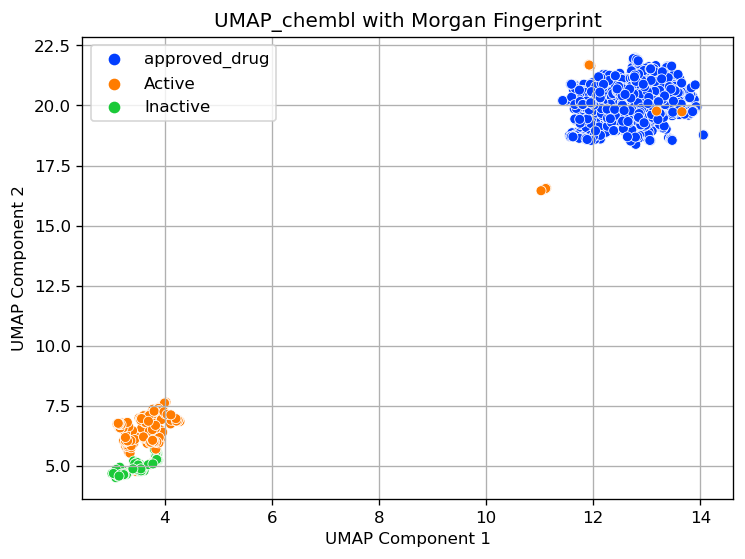

In [37]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_morgan, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP_chembl with Morgan Fingerprint', fontsize=12)
plt.show()

In [38]:
def generate_rdk5(data):
    rdk5_gen = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath=5)
    rdk5_fingerprint = [rdk5_gen.GetFingerprint(mol) for mol in data]
    return rdk5_fingerprint

rdk5fp = generate_rdk5(df_all.structure[:])
print("Number of compounds converted:", len(rdk5fp))
print("Fingerprint length per compound:", len(rdk5fp[0]))

Number of compounds converted: 3418
Fingerprint length per compound: 2048


In [39]:
fp_name_rdk5 = [f'Bit_{i}' for i in range(2048)]
fp_bits_rdk5 = [list(l) for l in rdk5fp]

rdk5_df = pd.DataFrame(fp_bits_rdk5, index=df_all["type"], columns=fp_name_rdk5)
rdk5_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
rdk5_df.rename(columns={"index": "type"})# Rename the index column to "cid"
rdk5_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,approved_drug,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,approved_drug,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,approved_drug,1,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,approved_drug,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [40]:
rdk5_df_umap = rdk5_df.iloc[:, 1:]
rdk5_df_umap

,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,Bit_9,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,1,0,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,1,0,0,1
3414,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3415,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3416,1,0,1,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [41]:
umapper = umap.UMAP(n_neighbors=50, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_rdk5 = umapper.fit_transform(rdk5_df_umap)

data_umap_rdk5_x = pd.DataFrame(data_umap_rdk5[:, 0], columns = ['x'])
data_umap_rdk5_y = pd.DataFrame(data_umap_rdk5[:, 1], columns = ['y'])
type = pd.DataFrame(rdk5_df["type"].values, columns = ['type'])
plot_umap_rdk5 = pd.concat([type, data_umap_rdk5_x, data_umap_rdk5_y], axis=1)
plot_umap_rdk5

,type,x,y
0,approved_drug,-10.967045,2.080429
1,approved_drug,-14.858323,0.500606
2,approved_drug,-17.341887,1.025589
3,approved_drug,-14.183787,1.571211
4,approved_drug,-16.158085,1.702953
...,...,...,...
3413,Active,-3.375938,-0.636983
3414,Active,-3.972794,0.377354
3415,Active,-5.152436,-0.343601
3416,Active,-5.169722,-0.353406


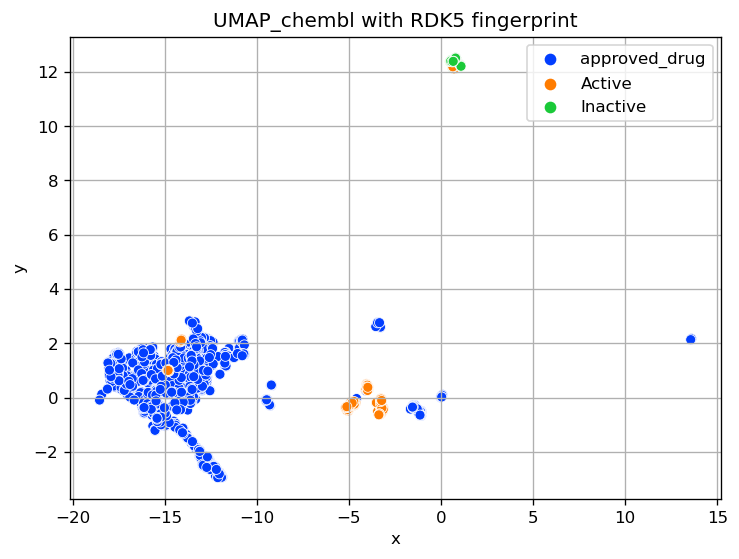

In [42]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_rdk5, palette='bright')
plt.grid()
plt.legend()
plt.title('UMAP_chembl with RDK5 fingerprint', fontsize=12)
plt.show()

In [43]:
df_drugbank = pd.read_csv("drugbank_drug_approved.csv")
df_drugbank

,DrugBank ID,Name,CAS Number,Drug Groups,InChIKey,InChI,SMILES,Formula,KEGG Compound ID,KEGG Drug ID,PubChem Compound ID,PubChem Substance ID,ChEBI ID,ChEMBL ID,HET ID,ChemSpider ID,BindingDB ID
0,DB06283,Ziconotide,107452-89-1,approved,BPKIMPVREBSLAJ-QTBYCLKRSA-N,InChI=1S/C102H172N36O32S7/c1-50(2)34-63-91(161...,[H][C@]12CSSC[C@]3([H])NC(=O)[C@H](CCCCN)NC(=O...,C102H172N36O32S7,NaN,D06363,NaN,347910345.0,NaN,CHEMBL4594214,NaN,17291932.0,NaN
1,DB06119,Cenobamate,913088-80-9,approved; investigational,GFHAXPJGXSQLPT-VIFPVBQESA-N,InChI=1S/C10H10ClN5O2/c11-8-4-2-1-3-7(8)9(18-1...,NC(=O)O[C@@H](CN1N=CN=N1)C1=C(Cl)C=CC=C1,C10H10ClN5O2,NaN,NaN,NaN,NaN,NaN,CHEMBL3989949,NaN,10136642.0,NaN
2,DB12243,Edaravone,89-25-8,approved; investigational,QELUYTUMUWHWMC-UHFFFAOYSA-N,InChI=1S/C10H10N2O/c1-8-7-10(13)12(11-8)9-5-3-...,CC1=NN(C(=O)C1)C1=CC=CC=C1,C10H10N2O,C13008,D01552,4021.0,347828521.0,31530.0,CHEMBL290916,W1P,3881.0,50200541.0
3,DB00359,Sulfadiazine,68-35-9,approved; investigational; vet_approved,SEEPANYCNGTZFQ-UHFFFAOYSA-N,"InChI=1S/C10H10N4O2S/c11-8-2-4-9(5-3-8)17(15,1...",NC1=CC=C(C=C1)S(=O)(=O)NC1=NC=CC=N1,C10H10N4O2S,C07658,D00587,5215.0,46506164.0,9328.0,CHEMBL439,NaN,5026.0,50166571.0
4,DB00631,Clofarabine,123318-82-1,approved; investigational,WDDPHFBMKLOVOX-AYQXTPAHSA-N,InChI=1S/C10H11ClFN5O3/c11-10-15-7(13)5-8(16-1...,[H][C@]1(F)[C@H](O)[C@@H](CO)O[C@H]1N1C=NC2=C(...,C10H11ClFN5O3,NaN,NaN,119182.0,46504968.0,681569.0,CHEMBL1750,CFB,106472.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2428,DB11129,Carbamide peroxide,124-43-6,approved,AQLJVWUFPCUVLO-UHFFFAOYSA-N,"InChI=1S/CH4N2O.H2O2/c2-1(3)4;1-2/h(H4,2,3,4);...",OO.NC(N)=O,CH6N2O3,NaN,NaN,31294.0,347827910.0,75178.0,CHEMBL3184026,NaN,29034.0,NaN
2429,DB14078,Medronic acid,1984-15-2,approved; investigational,MBKDYNNUVRNNRF-UHFFFAOYSA-N,"InChI=1S/CH6O6P2/c2-8(3,4)1-9(5,6)7/h1H2,(H2,2...",OP(O)(=O)CP(O)(O)=O,CH6O6P2,NaN,D04887,NaN,NaN,43945.0,CHEMBL180570,MDN,15308.0,50162816.0
2430,DB14159,Oxidronic acid,15468-10-7,approved,HJZKOAYDRQLPME-UHFFFAOYSA-N,"InChI=1S/CH6O7P2/c2-1(9(3,4)5)10(6,7)8/h1-2H,(...",OC(P(O)(O)=O)P(O)(O)=O,CH6O7P2,NaN,NaN,NaN,NaN,134844.0,CHEMBL1615775,NaN,25412.0,NaN
2431,DB09138,Technetium Tc-99m medronate,121524-79-6,approved,IUPNVOAUFBLQME-SGNQUONSSA-J,"InChI=1S/CH6O6P2.2H2O.Tc/c2-8(3,4)1-9(5,6)7;;;...",O.O.[98Tc+4].[O-]P([O-])(=O)CP([O-])([O-])=O,CH6O8P2Tc,NaN,D02029,131704315.0,310265053.0,32186.0,CHEMBL2110576,NaN,34995234.0,NaN


In [44]:
df_drugbank = df_drugbank[['ChEMBL ID']]
df_drugbank = df_drugbank.rename(columns={'ChEMBL ID':'molecule_chembl_id'})
df_drugbank

,molecule_chembl_id
0,CHEMBL4594214
1,CHEMBL3989949
2,CHEMBL290916
3,CHEMBL439
4,CHEMBL1750
...,...
2428,CHEMBL3184026
2429,CHEMBL180570
2430,CHEMBL1615775
2431,CHEMBL2110576


In [45]:
compounds_provider = molecule.filter(
    molecule_chembl_id__in=list(df_drugbank["molecule_chembl_id"])
).only("molecule_chembl_id", "molecule_structures")

In [46]:
compounds = list(tqdm(compounds_provider))

100%|██████████| 2425/2425 [08:00<00:00,  5.05it/s]


In [47]:
drug_approved_drugbank_df = pd.DataFrame.from_records(
    compounds,
)
print(f"DataFrame shape: {drug_approved_drugbank_df.shape}")
drug_approved_drugbank_df

DataFrame shape: (2425, 2)


,molecule_chembl_id,molecule_structures
0,CHEMBL2,{'canonical_smiles': 'COc1cc2nc(N3CCN(C(=O)c4c...
1,CHEMBL3,"{'canonical_smiles': 'CN1CCC[C@H]1c1cccnc1', '..."
2,CHEMBL4,{'canonical_smiles': 'CC1COc2c(N3CCN(C)CC3)c(F...
3,CHEMBL5,{'canonical_smiles': 'CCn1cc(C(=O)O)c(=O)c2ccc...
4,CHEMBL6,{'canonical_smiles': 'COc1ccc2c(c1)c(CC(=O)O)c...
...,...,...
2420,CHEMBL4585668,{'canonical_smiles': 'CS(=O)(=O)c1ccc(Oc2cc(F)...
2421,CHEMBL4594214,{'canonical_smiles': 'CSCC[C@@H]1NC(=O)[C@H](C...
2422,CHEMBL4594350,{'canonical_smiles': 'C=C(F)C(=O)N1CCN(c2nc(OC...
2423,CHEMBL4744444,{'canonical_smiles': 'CCCCCCCCCC(=O)N[C@@H](Cc...


In [48]:
drug_approved_drugbank_df.dropna(axis=0, how="any", inplace=True)
print(f"DataFrame shape: {drug_approved_drugbank_df.shape}")

DataFrame shape: (2394, 2)


In [49]:
canonical_smiles = []

for i, compounds in drug_approved_drugbank_df.iterrows():
    try:
        canonical_smiles.append(compounds["molecule_structures"]["canonical_smiles"])
    except KeyError:
        canonical_smiles.append(None)

drug_approved_drugbank_df["smiles"] = canonical_smiles
drug_approved_drugbank_df.drop("molecule_structures", axis=1, inplace=True)
print(f"DataFrame shape: {drug_approved_drugbank_df.shape}")
drug_approved_drugbank_df

DataFrame shape: (2394, 2)


,molecule_chembl_id,smiles
0,CHEMBL2,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC
1,CHEMBL3,CN1CCC[C@H]1c1cccnc1
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23
3,CHEMBL5,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21
4,CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1
...,...,...
2420,CHEMBL4585668,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...
2421,CHEMBL4594214,CSCC[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCN...
2422,CHEMBL4594350,C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN...
2423,CHEMBL4744444,CCCCCCCCCC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N...


In [50]:
drug_approved_drugbank_df.insert(2, 'type', 'approved_drug')
drug_approved_drugbank_df

,molecule_chembl_id,smiles,type
0,CHEMBL2,COc1cc2nc(N3CCN(C(=O)c4ccco4)CC3)nc(N)c2cc1OC,approved_drug
1,CHEMBL3,CN1CCC[C@H]1c1cccnc1,approved_drug
2,CHEMBL4,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,approved_drug
3,CHEMBL5,CCn1cc(C(=O)O)c(=O)c2ccc(C)nc21,approved_drug
4,CHEMBL6,COc1ccc2c(c1)c(CC(=O)O)c(C)n2C(=O)c1ccc(Cl)cc1,approved_drug
...,...,...,...
2420,CHEMBL4585668,CS(=O)(=O)c1ccc(Oc2cc(F)cc(C#N)c2)c2c1[C@H](O)...,approved_drug
2421,CHEMBL4594214,CSCC[C@@H]1NC(=O)[C@H](CC(C)C)NC(=O)[C@H](CCCN...,approved_drug
2422,CHEMBL4594350,C=C(F)C(=O)N1CCN(c2nc(OC[C@@H]3CCCN3C)nc3c2CCN...,approved_drug
2423,CHEMBL4744444,CCCCCCCCCC(=O)N[C@@H](Cc1c[nH]c2ccccc12)C(=O)N...,approved_drug


In [51]:
drugbank = []

for _, smiles, type in drug_approved_drugbank_df[['smiles', 'type']].itertuples():
    drugbank.append((Chem.MolFromSmiles(smiles), type))
drugbank[:5]

[13:28:00] WARNING: not removing hydrogen atom without neighbors
[13:28:00] WARNING: not removing hydrogen atom without neighbors
[13:28:00] WARNING: not removing hydrogen atom without neighbors
[13:28:00] WARNING: not removing hydrogen atom without neighbors


[(<rdkit.Chem.rdchem.Mol at 0x18268199460>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x18268198cf0>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x18268198ba0>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x18268199f50>, 'approved_drug'),
 (<rdkit.Chem.rdchem.Mol at 0x182680c1540>, 'approved_drug')]

In [52]:
approved_drugbank_structure = pd.DataFrame(drugbank, columns=['structure', 'type'])
approved_drugbank_structure.shape

(2394, 2)

In [53]:
df_all_drugbank_gpr6 = pd.concat([approved_drugbank_structure, gpr6_compounds_structure])
df_all_drugbank_gpr6

,structure,type
0,<rdkit.Chem.rdchem.Mol object at 0x00000182681...,approved_drug
1,<rdkit.Chem.rdchem.Mol object at 0x00000182681...,approved_drug
2,<rdkit.Chem.rdchem.Mol object at 0x00000182681...,approved_drug
3,<rdkit.Chem.rdchem.Mol object at 0x00000182681...,approved_drug
4,<rdkit.Chem.rdchem.Mol object at 0x00000182680...,approved_drug
...,...,...
401,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
402,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
403,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active
404,<rdkit.Chem.rdchem.Mol object at 0x00000182683...,Active


In [54]:
maccsfp_db = generate_maccs(df_all_drugbank_gpr6.structure[:])

fp_name_maccs_db = [f'Bit_{i}' for i in range(167)]
fp_bits_maccs_db = [list(l) for l in maccsfp_db]

maccsfp_db_df = pd.DataFrame(fp_bits_maccs_db, index=df_all_drugbank_gpr6["type"], columns=fp_name_maccs_db)
maccsfp_db_df.reset_index(inplace=True)
maccsfp_db_df.rename(columns={"index": "type"})
maccsfp_db_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_157,Bit_158,Bit_159,Bit_160,Bit_161,Bit_162,Bit_163,Bit_164,Bit_165,Bit_166
0,approved_drug,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,0,1,0
2,approved_drug,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
3,approved_drug,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,approved_drug,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [55]:
maccsfp_db_df_umap = maccsfp_db_df.iloc[:, 1:]

umapper = umap.UMAP(n_neighbors=50, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_maccs_db = umapper.fit_transform(maccsfp_db_df_umap)

data_umap_maccs_db_x = pd.DataFrame(data_umap_maccs_db[:, 0], columns = ['x'])
data_umap_maccs_db_y = pd.DataFrame(data_umap_maccs_db[:, 1], columns = ['y'])
type = pd.DataFrame(maccsfp_db_df["type"].values, columns = ['type'])
plot_umap_maccs_db = pd.concat([type, data_umap_maccs_db_x, data_umap_maccs_db_y], axis = 1)
plot_umap_maccs_db


,type,x,y
0,approved_drug,3.261170,0.626009
1,approved_drug,4.707806,-0.950811
2,approved_drug,2.257588,1.582452
3,approved_drug,4.177261,-1.248917
4,approved_drug,4.565798,-1.829831
...,...,...,...
2795,Active,1.345422,1.916935
2796,Active,1.658155,2.018828
2797,Active,5.025909,1.959877
2798,Active,5.068121,1.892165


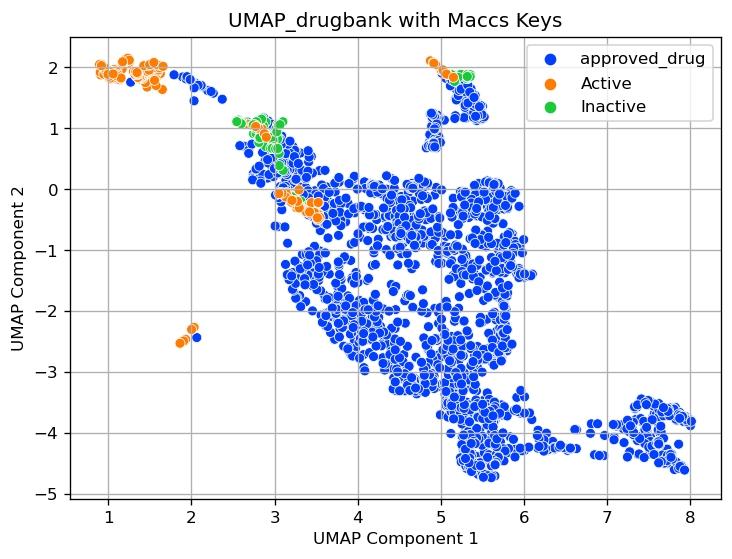

In [56]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_maccs_db, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP_drugbank with Maccs Keys', fontsize=12)
plt.show()

In [57]:
mfpts_db = generate_mfpts(df_all_drugbank_gpr6.structure[:])

fp_name_morgan_db = [f'Bit_{i}' for i in range(2048)]
fp_bits_morgan_db = [list(l) for l in mfpts_db]

morganfp_db_df = pd.DataFrame(fp_bits_morgan_db, index=df_all_drugbank_gpr6["type"], columns=fp_name_morgan_db)
morganfp_db_df.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
morganfp_db_df.rename(columns={"index": "type"})# Rename the index column to "cid"
morganfp_db_df.head()

,type,Bit_0,Bit_1,Bit_2,Bit_3,Bit_4,Bit_5,Bit_6,Bit_7,Bit_8,...,Bit_2038,Bit_2039,Bit_2040,Bit_2041,Bit_2042,Bit_2043,Bit_2044,Bit_2045,Bit_2046,Bit_2047
0,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,approved_drug,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,approved_drug,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,approved_drug,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


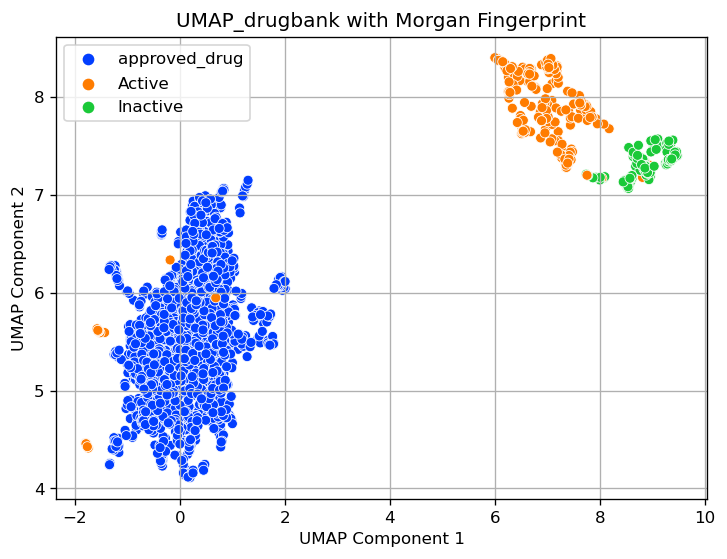

In [58]:
morganfp_df_db_umap = morganfp_db_df.iloc[:, 1:]

umapper = umap.UMAP(n_neighbors=50, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_db_morgan = umapper.fit_transform(morganfp_df_db_umap)

data_umap_morgan_db_x = pd.DataFrame(data_umap_db_morgan[:, 0], columns = ['x'])
data_umap_morgan_db_y = pd.DataFrame(data_umap_db_morgan[:, 1], columns = ['y'])
type = pd.DataFrame(morganfp_db_df["type"].values, columns = ['type'])
plot_umap_morgan_db = pd.concat([type, data_umap_morgan_db_x, data_umap_morgan_db_y], axis = 1)
plot_umap_morgan_db

plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_morgan_db, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP_drugbank with Morgan Fingerprint', fontsize=12)
plt.show()

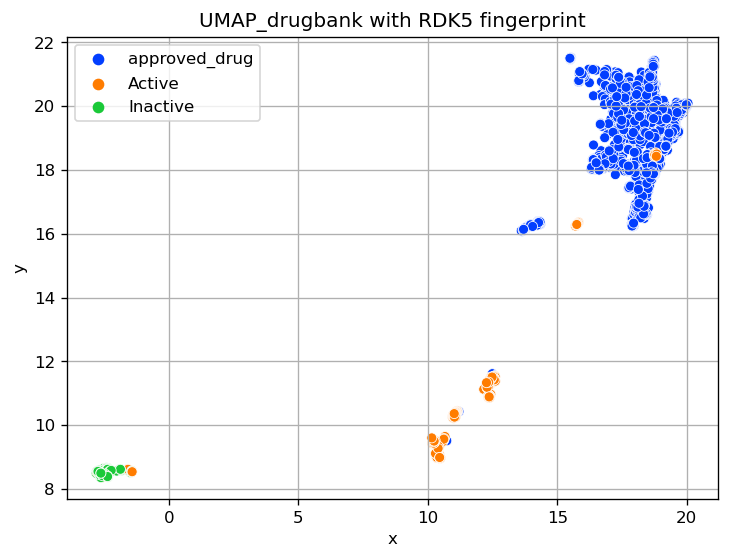

In [59]:
rdk5fp_db = generate_rdk5(df_all_drugbank_gpr6.structure[:])

fp_name_rdk5_db = [f'Bit_{i}' for i in range(2048)]
fp_bits_rdk5_db = [list(l) for l in rdk5fp_db]

rdk5_df_db = pd.DataFrame(fp_bits_rdk5_db, index=df_all_drugbank_gpr6["type"], columns=fp_name_rdk5_db)
rdk5_df_db.reset_index(inplace=True)  # Reset index to bring "cid" back as a column
rdk5_df_db.rename(columns={"index": "type"})# Rename the index column to "cid"
rdk5_df_db.head()

rdk5_df_umap_db = rdk5_df_db.iloc[:, 1:]

umapper = umap.UMAP(n_neighbors=50, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

data_umap_rdk5_db = umapper.fit_transform(rdk5_df_umap_db)

data_umap_rdk5_db_x = pd.DataFrame(data_umap_rdk5_db[:, 0], columns = ['x'])
data_umap_rdk5_db_y = pd.DataFrame(data_umap_rdk5_db[:, 1], columns = ['y'])
type = pd.DataFrame(rdk5_df_db["type"].values, columns = ['type'])
plot_umap_rdk5_db = pd.concat([type, data_umap_rdk5_db_x, data_umap_rdk5_db_y], axis=1)
plot_umap_rdk5_db

plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_rdk5_db, palette='bright')
plt.grid()
plt.legend()
plt.title('UMAP_drugbank with RDK5 fingerprint', fontsize=12)
plt.show()

In [60]:
output_df

,molecule_chembl_id,smiles,type
0,CHEMBL1240,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...,approved_drug
1,CHEMBL1241,CN(C)CCN(Cc1ccccc1)c1ccccn1,approved_drug
2,CHEMBL1242,Nc1ccc(/N=N/c2ccccc2)c(N)n1,approved_drug
3,CHEMBL141305,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1,approved_drug
4,CHEMBL139877,NC(=O)NS(=O)(=O)c1ccc(N)cc1,approved_drug
...,...,...,...
3007,CHEMBL3989678,C1CNCCN1.C1CNCCN1.C1CNCCN1.O.O=C(O)CC(O)(CC(=O...,approved_drug
3008,CHEMBL3989691,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,approved_drug
3009,CHEMBL3989693,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...,approved_drug
3010,CHEMBL3989694,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1.O.O=C(O)c1...,approved_drug


In [61]:
df_chembl = output_df[['smiles', 'type']]
df_chembl

,smiles,type
0,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...,approved_drug
1,CN(C)CCN(Cc1ccccc1)c1ccccn1,approved_drug
2,Nc1ccc(/N=N/c2ccccc2)c(N)n1,approved_drug
3,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1,approved_drug
4,NC(=O)NS(=O)(=O)c1ccc(N)cc1,approved_drug
...,...,...
3007,C1CNCCN1.C1CNCCN1.C1CNCCN1.O.O=C(O)CC(O)(CC(=O...,approved_drug
3008,CC1=NN(c2ccc(C)c(C)c2)C(=O)/C1=N\Nc1cccc(-c2cc...,approved_drug
3009,CC(C)(C)NC[C@H](O)c1ccc(O)c(CO)c1.CC(C)(C)NC[C...,approved_drug
3010,Cc1cc2c(s1)Nc1ccccc1N=C2N1CCN(C)CC1.O.O=C(O)c1...,approved_drug


In [62]:
df3 = df2.rename(columns={'bioactivity': 'type'})
df3

,smiles,type
0,C[C@@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2C...,Active
1,C[C@@H]1C[C@H]1Nc1nc2cnncc2nc1N1CCC([C@@H](F)c...,Active
2,C[C@H](CO)Nc1nc2ccccc2nc1N1CCN(Cc2cc(Cl)ccc2Cl...,Active
3,c1ccc2nc(N3CCN(Cc4coc5ccccc45)CC3)c(NC3CC3)nc2c1,Active
4,CC(=O)c1ccc(OC2CCN(c3nc4cnccc4nc3NC3CC3)CC2)cc...,Active
...,...,...
401,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,Active
402,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,Active
403,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active
404,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,Active


In [63]:
dataset = pd.concat([df_chembl, df3], ignore_index=True)
dataset

,smiles,type
0,CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)...,approved_drug
1,CN(C)CCN(Cc1ccccc1)c1ccccn1,approved_drug
2,Nc1ccc(/N=N/c2ccccc2)c(N)n1,approved_drug
3,CC(=O)Oc1ccc(C(=C2CCCCC2)c2ccc(OC(C)=O)cc2)cc1,approved_drug
4,NC(=O)NS(=O)(=O)c1ccc(N)cc1,approved_drug
...,...,...
3413,O=C(O)C(F)(F)F.O=C(c1nccc2nc(NC3CC3)c(N3CCC([C...,Active
3414,O=C(O)C(F)(F)F.Oc1ccc(OC2CCN(c3nc4ccncc4nc3NC3...,Active
3415,O=S(=O)(c1ccccc1)N1CCN(c2nc3cc(F)ccc3nc2NC2CC2...,Active
3416,O=S(=O)(c1ccccc1)N1CCN(c2nc3ccccc3nc2NC2CC2)CC1,Active


In [64]:
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem

In [65]:
smile = [Chem.MolFromSmiles(i) for i in dataset.smiles]
mol = [m for m in smile]
descriptors = [Descriptors.CalcMolDescriptors(i) for i in mol]
all_desc= pd.DataFrame(descriptors)

[13:29:25] WARNING: not removing hydrogen atom without neighbors
[13:29:25] WARNING: not removing hydrogen atom without neighbors
[13:29:25] WARNING: not removing hydrogen atom without neighbors
[13:29:25] WARNING: not removing hydrogen atom without neighbors
[13:30:16] WARNING: not removing hydrogen atom without neighbors
[13:30:16] WARNING: not removing hydrogen atom without neighbors
[13:30:16] WARNING: not removing hydrogen atom without neighbors
[13:30:16] WARNING: not removing hydrogen atom without neighbors
[13:30:17] WARNING: not removing hydrogen atom without neighbors
[13:30:17] WARNING: not removing hydrogen atom without neighbors
[13:30:17] WARNING: not removing hydrogen atom without neighbors
[13:30:17] WARNING: not removing hydrogen atom without neighbors


In [66]:
label = dataset['type']
label_df = pd.DataFrame(label)
label_df['type_int'] = pd.Categorical(label_df['type']).codes
label_2 = label_df['type_int']
label_df_2 = pd.DataFrame(label_2)
label_df_2

,type_int
0,2
1,2
2,2
3,2
4,2
...,...
3413,0
3414,0
3415,0
3416,0


In [67]:
all_desc = all_desc.dropna(axis=1)
all_desc

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.064406,13.064406,0.000000,-0.441661,0.499141,448.401,418.161,447.140906,152,0,...,0,0,0,0,0,0,0,0,0,0
1,4.460591,4.460591,0.894537,0.894537,0.790803,255.365,234.197,255.173548,100,0,...,0,0,0,0,0,0,0,0,0,0
2,5.640676,5.640676,0.277483,0.277483,0.751168,213.244,202.156,213.101445,80,0,...,0,0,0,0,0,0,0,0,0,0
3,11.141681,11.141681,0.324381,-0.324381,0.545333,364.441,340.249,364.167459,140,0,...,0,0,0,0,0,0,0,0,0,0
4,11.301132,11.301132,0.064352,-3.856389,0.583236,215.234,206.162,215.036462,76,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,15.248740,15.248740,0.107614,-5.083333,0.362385,640.585,610.345,640.223273,242,0,...,0,0,0,0,0,0,0,0,0,0
3414,13.948646,13.948646,0.080787,-5.083333,0.436243,509.460,486.276,509.168617,192,0,...,0,0,0,0,0,0,0,0,0,0
3415,13.704517,13.704517,0.301399,-3.521641,0.674721,427.505,405.329,427.147824,156,0,...,0,1,0,0,0,0,0,0,0,0
3416,12.892994,12.892994,0.342626,-3.466435,0.698143,409.515,386.331,409.157246,150,0,...,0,1,0,0,0,0,0,0,0,0


In [68]:
from sklearn import preprocessing

In [69]:
scaler = preprocessing.StandardScaler()
scaler.fit(all_desc)
all_desc_scaled = scaler.transform(all_desc)
all_desc_scaled

array([[ 0.59181127,  0.59181127, -0.43320235, ..., -0.13725655,
        -0.2035969 , -0.19325977],
       [-2.26541789, -2.26541789,  1.82104032, ..., -0.13725655,
        -0.2035969 , -0.19325977],
       [-1.87352511, -1.87352511,  0.2660565 , ..., -0.13725655,
        -0.2035969 , -0.19325977],
       ...,
       [ 0.80438498,  0.80438498,  0.32632672, ..., -0.13725655,
        -0.2035969 , -0.19325977],
       [ 0.53488737,  0.53488737,  0.43021834, ..., -0.13725655,
        -0.2035969 , -0.19325977],
       [ 0.56161653,  0.56161653,  0.36685455, ..., -0.13725655,
        -0.2035969 , -0.19325977]])

In [70]:
df_all_desc_scaled = pd.DataFrame(all_desc_scaled, columns=all_desc.columns)
df_all_desc_scaled_label = label_df_2.join(df_all_desc_scaled)
df_all_desc_scaled_label

,type_int,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,2,0.591811,0.591811,-0.433202,0.636157,-0.042062,0.146431,0.130463,0.143054,0.004052,...,-0.220989,-0.220097,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
1,2,-2.265418,-2.265418,1.821040,1.402798,1.232733,-0.738323,-0.763589,-0.737472,-0.640628,...,-0.220989,-0.220097,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
2,2,-1.873525,-1.873525,0.266056,1.048764,1.059494,-0.931378,-0.919306,-0.930450,-0.888582,...,-0.220989,-0.220097,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
3,2,-0.046704,-0.046704,0.384241,0.703446,0.159835,-0.238388,-0.248184,-0.237533,-0.144721,...,-0.220989,-0.220097,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
4,2,0.006248,0.006248,-0.271035,-1.323035,0.325502,-0.922258,-0.899837,-0.921574,-0.938173,...,-0.220989,3.718598,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,4.558984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0,1.317204,1.317204,-0.162015,-2.026992,-0.639791,1.027280,1.064464,1.028693,1.119843,...,-0.220989,-0.220097,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
3414,0,0.885457,0.885457,-0.229618,-2.026992,-0.316977,0.426287,0.461498,0.427565,0.499959,...,-0.220989,-0.220097,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
3415,0,0.804385,0.804385,0.326327,-1.130975,0.725362,0.050657,0.068101,0.051348,0.053642,...,-0.220989,3.718598,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260
3416,0,0.534887,0.534887,0.430218,-1.099300,0.827736,-0.031797,-0.024228,-0.031172,-0.020744,...,-0.220989,3.718598,-0.100236,-0.082308,-0.100393,-0.132772,0.0,-0.137257,-0.203597,-0.193260


In [71]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier

In [78]:
rf = RandomForestClassifier()

feat_selector = BorutaPy(rf, random_state=42, max_iter=200, n_estimators=100)
feat_selector.fit(df_all_desc_scaled_label.drop(['type_int'], axis=1).values, df_all_desc_scaled_label['type_int'].values)

BorutaPy(estimator=RandomForestClassifier(random_state=RandomState(MT19937) at 0x1823E434F40),
         max_iter=200, n_estimators=100,
         random_state=RandomState(MT19937) at 0x1823E434F40)

In [79]:
all_desc.columns[feat_selector.support_]

Index(['MaxAbsEStateIndex', 'MaxEStateIndex', 'MinAbsEStateIndex',
       'MinEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt',
       'NumValenceElectrons', 'FpDensityMorgan1',
       ...
       'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_alkyl_halide', 'fr_amide',
       'fr_amidine', 'fr_aniline', 'fr_bicyclic', 'fr_halogen',
       'fr_piperdine'],
      dtype='object', length=107)

In [80]:
selected_feature = feat_selector.transform(all_desc_scaled)
print(selected_feature.shape)

(3418, 107)


In [81]:
selected_feature_df =pd.DataFrame(selected_feature, columns=all_desc.columns[feat_selector.support_])
selected_feature_df

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan1,...,fr_Imine,fr_NH0,fr_NH1,fr_alkyl_halide,fr_amide,fr_amidine,fr_aniline,fr_bicyclic,fr_halogen,fr_piperdine
0,0.591811,0.591811,-0.433202,0.636157,-0.042062,0.146431,0.130463,0.143054,0.004052,-0.516323,...,-0.177929,-0.427395,-0.700781,-0.343503,-0.521480,-0.142,-0.653495,0.543743,-0.027498,-0.414051
1,-2.265418,-2.265418,1.821040,1.402798,1.232733,-0.738323,-0.763589,-0.737472,-0.640628,-0.785875,...,-0.177929,0.680979,-0.700781,-0.343503,-0.521480,-0.142,0.418312,-0.623665,-0.649933,-0.414051
2,-1.873525,-1.873525,0.266056,1.048764,1.059494,-0.931378,-0.919306,-0.930450,-0.888582,-0.862370,...,-0.177929,0.680979,-0.700781,-0.343503,-0.521480,-0.142,1.490119,-0.623665,-0.649933,-0.414051
3,-0.046704,-0.046704,0.384241,0.703446,0.159835,-0.238388,-0.248184,-0.237533,-0.144721,-1.669812,...,-0.177929,-0.981582,-0.700781,-0.343503,-0.521480,-0.142,-0.653495,-0.623665,-0.649933,-0.414051
4,0.006248,0.006248,-0.271035,-1.323035,0.325502,-0.922258,-0.899837,-0.921574,-0.938173,0.452607,...,-0.177929,-0.981582,0.270537,-0.343503,1.354750,-0.142,0.418312,-0.623665,-0.649933,-0.414051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,1.317204,1.317204,-0.162015,-2.026992,-0.639791,1.027280,1.064464,1.028693,1.119843,-0.377905,...,-0.177929,1.789352,0.270537,3.233319,0.416635,-0.142,1.490119,-0.039961,3.084680,1.543385
3414,0.885457,0.885457,-0.229618,-2.026992,-0.316977,0.426287,0.461498,0.427565,0.499959,-0.054928,...,-0.177929,1.235166,0.270537,2.339113,-0.521480,-0.142,1.490119,-0.039961,1.839809,1.543385
3415,0.804385,0.804385,0.326327,-1.130975,0.725362,0.050657,0.068101,0.051348,0.053642,-0.636286,...,-0.177929,1.235166,0.270537,-0.343503,-0.521480,-0.142,1.490119,-0.039961,-0.027498,-0.414051
3416,0.534887,0.534887,0.430218,-1.099300,0.827736,-0.031797,-0.024228,-0.031172,-0.020744,-1.046133,...,-0.177929,1.235166,0.270537,-0.343503,-0.521480,-0.142,1.490119,-0.039961,-0.649933,-0.414051


In [82]:
umapper = umap.UMAP(n_neighbors=20, 
                    n_components=5,
                    metric='euclidean', 
                    random_state=42
                    )

umapper_all_desc = umapper.fit_transform(selected_feature_df)

umap_all_desc_x = pd.DataFrame(umapper_all_desc[:, 0], columns = ['x'])
umap_all_desc_y = pd.DataFrame(umapper_all_desc[:, 1], columns = ['y'])
type = pd.DataFrame(dataset['type'], columns = ['type'])
plot_umap_desc_chembl = pd.concat([type, umap_all_desc_x, umap_all_desc_y], axis = 1)
plot_umap_desc_chembl.shape

(3418, 3)

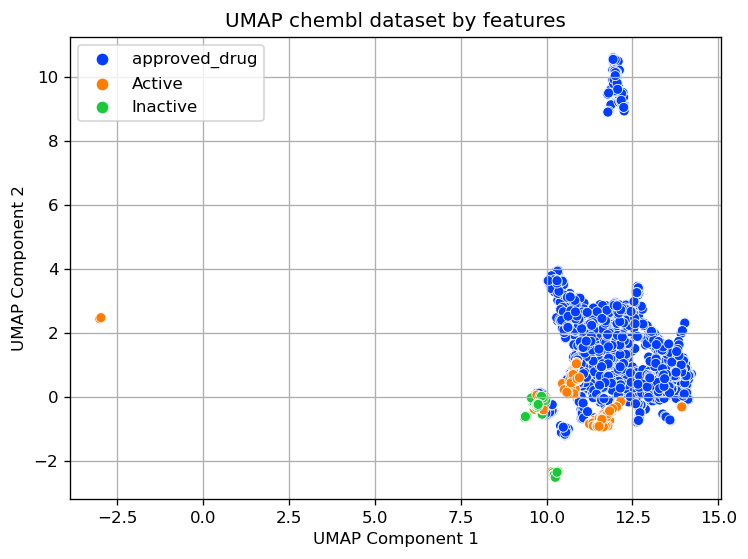

In [83]:
plt.figure(figsize = (7, 5), dpi=120)
sns.scatterplot(x='x', y='y', hue='type', data=plot_umap_desc_chembl, palette='bright')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid()
plt.legend()
plt.title('UMAP chembl dataset by features', fontsize=12)
plt.show()